<a href="https://colab.research.google.com/github/saadspark/Machine-Learning/blob/main/Linear_Regression_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Generate Data

We’ll make a simple linear dataset:

y=4x+3+noise

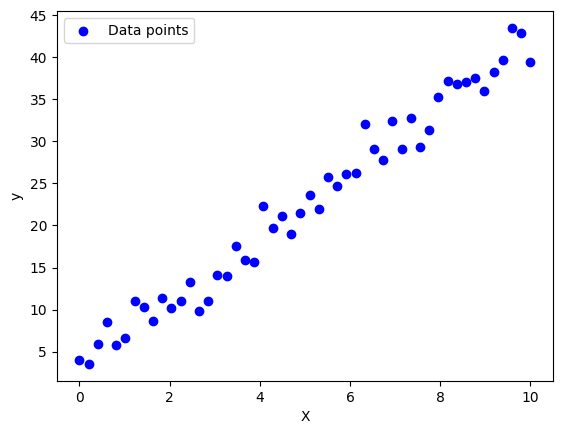

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create dataset
np.random.seed(42)   # for reproducibility
X = np.linspace(0, 10, 50)   # 50 points between 0 and 10
y = 4 * X + 3 + np.random.randn(50) * 2  # add noise

# Plot the dataset
plt.scatter(X, y, color="blue", label="Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


Step 2: Hypothesis (Prediction Function)

In linear regression, our model is a straight line:

X,m,b and returns predictions:

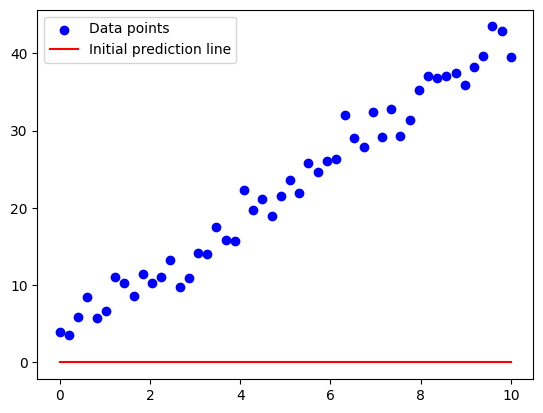

In [28]:
# Step 2: Hypothesis function
def predict(X, m, b):
    return m * X + b

# Test with random m, b
m, b = 0, 0 # start with zeros
y_pred = predict(X, m, b)

# Plot predictions vs actual
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred, color="red", label="Initial prediction line")
plt.legend()
plt.show()


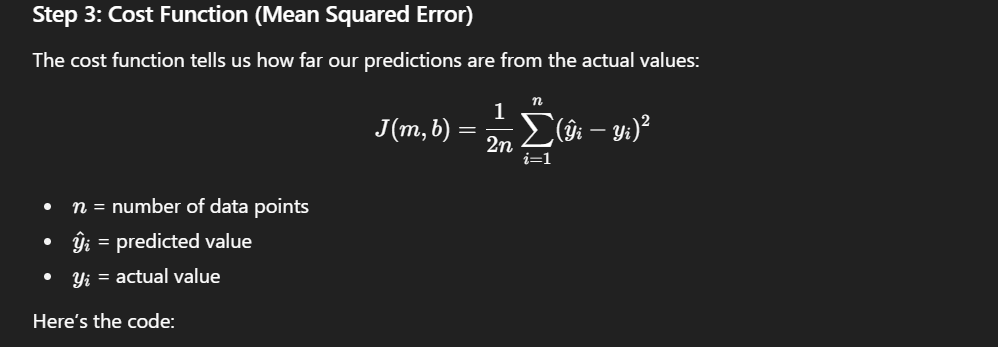

In [29]:
# Step 3: Cost function (Mean Squared Error)
def compute_cost(X, y, m, b):
    n = len(y)
    predictions = predict(X, m, b)
    cost = (1 / (2 * n)) * np.sum((predictions - y) ** 2)
    return cost

# Test cost with m=0, b=0
initial_cost = compute_cost(X, y, m=0, b=0)
print("Initial cost:", initial_cost)


Initial cost: 321.3028997929946


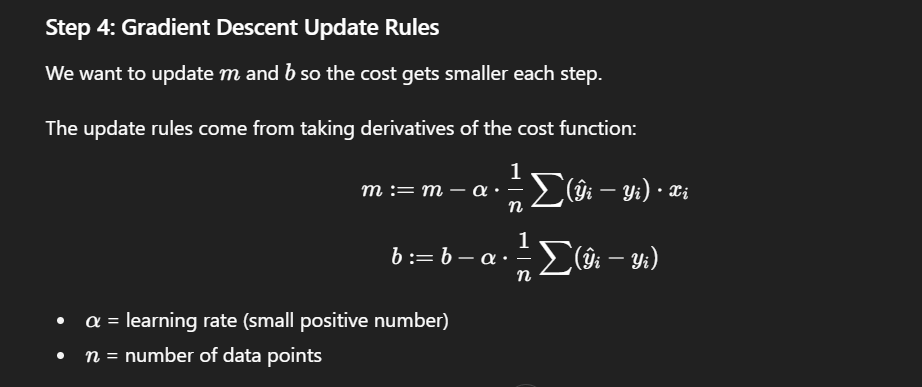

In [30]:
# Step 4: Gradient Descent
def gradient_descent(X, y, m, b, learning_rate, iterations):
    n = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = predict(X, m, b)
        error = predictions - y

        # Partial derivatives
        dm = (1/n) * np.dot(error, X)   # derivative wrt m
        db = (1/n) * np.sum(error)      # derivative wrt b

        # Update parameters
        m -= learning_rate * dm
        b -= learning_rate * db

        # Track cost
        cost = compute_cost(X, y, m, b)
        cost_history.append(cost)

        # Print every 100 iterations for tracking
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost:.4f}, m: {m:.4f}, b: {b:.4f}")

    return m, b, cost_history


In [34]:
# Initialize
m, b = 0, 0
learning_rate = 0.01
iterations = 1000

# Run gradient descent
m_final, b_final, cost_history = gradient_descent(X, y, m, b, learning_rate, iterations)
print("\nFinal parameters:")
print("m =", m_final)
print("b =", b_final)

Iteration 0, Cost: 139.5701, m: 1.4643, b: 0.2255
Iteration 100, Cost: 2.1308, m: 4.1730, b: 1.1974
Iteration 200, Cost: 1.9404, m: 4.1086, b: 1.6281
Iteration 300, Cost: 1.8254, m: 4.0585, b: 1.9628
Iteration 400, Cost: 1.7560, m: 4.0196, b: 2.2228
Iteration 500, Cost: 1.7141, m: 3.9894, b: 2.4248
Iteration 600, Cost: 1.6888, m: 3.9659, b: 2.5818
Iteration 700, Cost: 1.6736, m: 3.9476, b: 2.7038
Iteration 800, Cost: 1.6643, m: 3.9334, b: 2.7986
Iteration 900, Cost: 1.6588, m: 3.9224, b: 2.8722

Final parameters:
m = 3.91394142567725
b = 2.9289706917165454


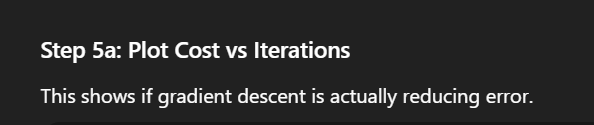

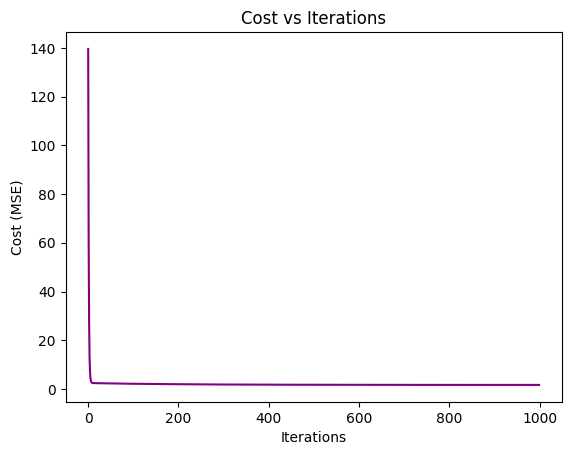

In [35]:
# Step 5a: Plot cost history
plt.plot(range(len(cost_history)), cost_history, color="purple")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost vs Iterations")
plt.show()


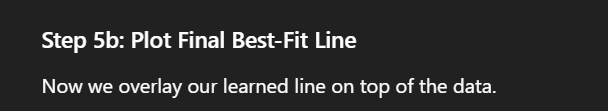

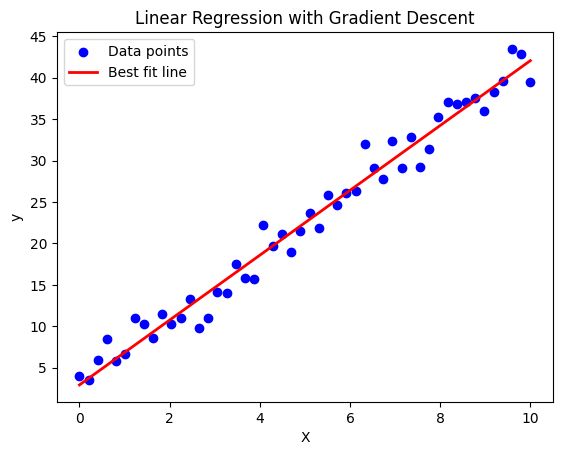

In [36]:
# Step 5b: Plot final regression line
y_pred_final = predict(X, m_final, b_final)

plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred_final, color="red", linewidth=2, label="Best fit line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression with Gradient Descent")
plt.show()
